# imports

In [1]:
import warnings

import numpy as np
import pandas as pd

from pydataset import data

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import env
import prepare

In [46]:
titanic = acquire.get_titanic_data(acquire.get_connection)
titanic.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


# cleaning data for titanic

In [47]:
titanic = prepare.prep_titanic(titanic)

In [48]:
titanic.head(1)
titanic = titanic.drop(columns=['sex','embark_town'])

# train,val,test

In [49]:
train,validate,test = prepare.split_data(titanic,'survived')

In [50]:
train.shape

(498, 9)

# create x and y versions of train

In [51]:
x_train = train.drop(columns=['survived'])
y_train = train.survived

In [52]:
x_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

In [53]:
x_test = test.drop(columns=['survived'])
y_test = test.survived

# Train Model

## creat decision tree

In [54]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the decision tree classifier to your training sample and transform

## fit the model

In [55]:
clf = clf.fit(x_train,y_train)

In [56]:

clf.score(x_train,y_train)

0.8092369477911646

In [57]:
clf.score(x_validate,y_validate)

0.8084112149532711

## visualize a decision

In [50]:
x_train.head(1)

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
111,3,1,0,14.4542,0,0,0,0


[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.362\nsamples = 173\nvalue = [41, 132]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 26.125\ngini = 0.021\nsamples = 93\nvalue = [1, 92]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 65\nvalue = [0, 65]\nclass = 1'),
 Text(0.375, 0.375, 'fare <= 23.35\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 65\nvalue = [26, 39]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'),
 Text(0.75, 0.625, 'fare <= 10.817\ngini = 0.297\nsamples = 325\nvalue = [266, 59]\nclass = 0'),
 Text(0.625, 0.375, 'parch <= 0.5\ngini = 0.171\nsamples = 170\nvalue = [154, 16]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.162\nsamples = 169\nvalue = [154, 15]\nclass = 0'),
 Text(0.6875, 0.125, 'gi

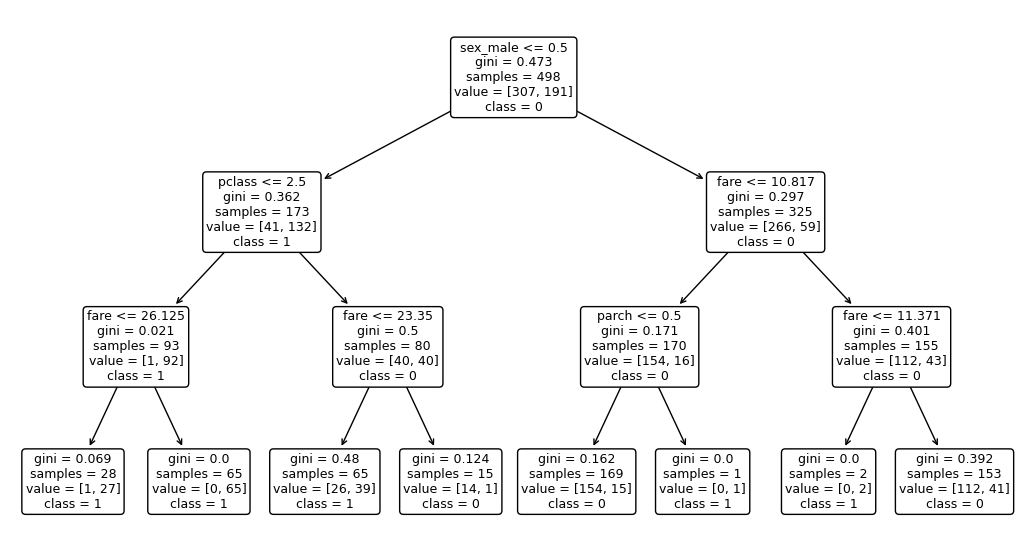

In [52]:
plt.figure(figsize=(13,7))
plot_tree(clf, feature_names = x_train.columns, class_names=['0','1'], rounded=True)


## make predictions

In [56]:
y_prediction = clf.predict(x_train)


array([1, 1, 0, 0, 0])

## estimate probability

In [58]:
y_prediction_probability = clf.predict_proba(x_train)
y_prediction_probability[0:5]

array([[0.4       , 0.6       ],
       [0.        , 1.        ],
       [0.9112426 , 0.0887574 ],
       [0.73202614, 0.26797386],
       [0.9112426 , 0.0887574 ]])

# Evaluate  in-sample results using the score, matrix and classification report.

## compute the accuracy

In [59]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


## create confusion matrix

In [62]:
confusion_matrix(y_train,y_prediction)

array([[280,  27],
       [ 57, 134]])

In [63]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [64]:
labels = sorted(y_train.unique())

In [65]:
pd.DataFrame(confusion_matrix(y_train, y_prediction), index=labels, columns=labels)


,0,1
0,280,27
1,57,134


## create classification report

In [67]:
print(classification_report(y_train, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       307
           1       0.83      0.70      0.76       191

    accuracy                           0.83       498
   macro avg       0.83      0.81      0.82       498
weighted avg       0.83      0.83      0.83       498



# compute: accuracy, TP rate, FP rate, TN rate, FN rate, recall, f1, support

In [103]:
tp1 = 134
fp1 = 27
tn1 = 280
fn1 = 57

In [104]:
# tp rate
tp1/(tp1+fn1)

0.7015706806282722

In [105]:
# fp rate
fp1/(fp1+tn1)

0.08794788273615635

In [106]:
# fn rate
fn1/(fn1+tp1)

0.29842931937172773

In [107]:
# tn rate
tn1/(tn1+fp1)

0.9120521172638436

In [69]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.80


In [ ]:
# this was within 3%

In [ ]:
# # Produce y_predictions that come from the X_validate

In [73]:
y_pred = clf.predict(x_validate)


In [75]:
# compare y values(from validate) to predict
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       132
           1       0.75      0.73      0.74        82

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



# run through steps 2-4 using a different max-depth

In [76]:
clf1 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [77]:
clf1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [78]:
clf1.score(x_train,y_train)

0.8493975903614458

[Text(0.5041666666666667, 0.9166666666666666, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(0.24166666666666667, 0.75, 'pclass <= 2.5\ngini = 0.362\nsamples = 173\nvalue = [41, 132]\nclass = 1'),
 Text(0.1, 0.5833333333333334, 'fare <= 26.125\ngini = 0.021\nsamples = 93\nvalue = [1, 92]\nclass = 1'),
 Text(0.06666666666666667, 0.4166666666666667, 'parch <= 0.5\ngini = 0.069\nsamples = 28\nvalue = [1, 27]\nclass = 1'),
 Text(0.03333333333333333, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = 1'),
 Text(0.1, 0.25, 'fare <= 24.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = 1'),
 Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = 1'),
 Text(0.13333333333333333, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 65\nvalue = [0, 65]\nclass = 1'),
 Text(0.38333333333333336, 0.5833333333333334,

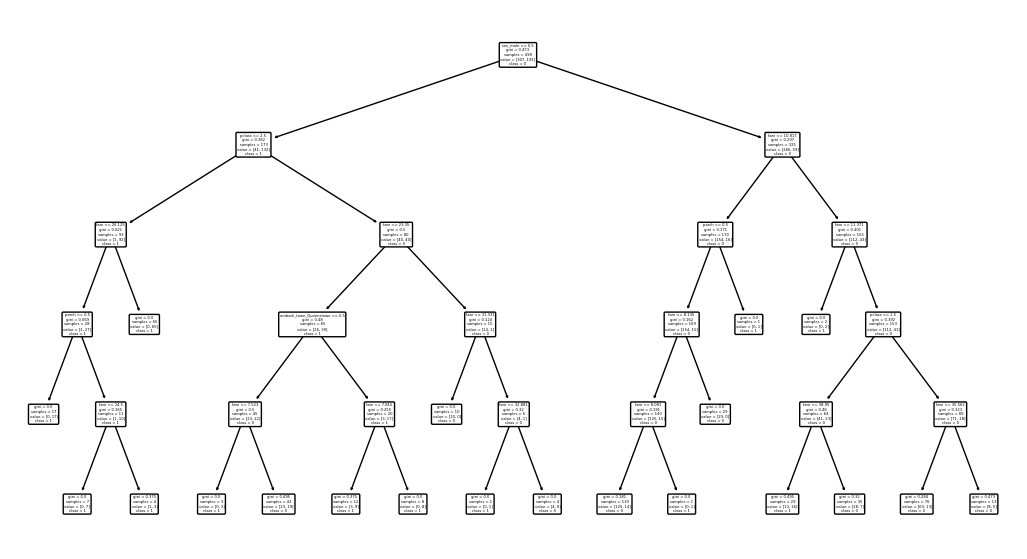

In [79]:
plt.figure(figsize=(13,7))
plot_tree(clf1, feature_names = x_train.columns, class_names=['0','1'], rounded=True)


In [81]:
y_prediction1 = clf1.predict(x_train)


In [82]:
confusion_matrix(y_train,y_prediction1)

array([[290,  17],
       [ 58, 133]])

In [83]:
print(classification_report(y_train, y_prediction1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89       307
           1       0.89      0.70      0.78       191

    accuracy                           0.85       498
   macro avg       0.86      0.82      0.83       498
weighted avg       0.85      0.85      0.85       498



In [ ]:
# i would say that in sample a bigger depth works

# out of sample

In [88]:
clf.score(x_validate,y_validate)

0.8037383177570093

In [89]:
clf1.score(x_validate,y_validate)

0.7570093457943925

In [87]:
# i would say that out of sample, a smaller depth worked better by a small margin

# 11 Telco Excercises

In [2]:
telco = acquire.get_telco_data(acquire.get_connection)
telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## clean telco

In [3]:
telco = prepare.prep_telco(telco)

In [13]:
cols_drop = [['gender',
     'total_charges'      
     'partner',
     'dependents',
     'phone_service',
     'multiple_lines',
     'online_security',
     'online_backup',
     'device_protection',
     'tech_support',
     'streaming_tv',
     'streaming_movies',
     'paperless_billing',
     'churn',
     'contract_type',
     'internet_service_type',
     'payment_type']]

In [7]:
telco.dtypes

customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                             object
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type        

In [27]:
telco =telco.drop(columns= ['customer_id','gender',
     'total_charges',      
     'partner',
     'dependents',
     'phone_service',
     'multiple_lines',
     'online_security',
     'online_backup',
     'device_protection',
     'tech_support',
     'streaming_tv',
     'streaming_movies',
     'paperless_billing',
     'churn',
     'contract_type',
     'internet_service_type',
     'payment_type'])
    

In [58]:
telco

,senior_citizen,tenure,monthly_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,9,59.90,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,4,73.90,1,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,13,98.00,1,1,0,1,0,0,0,...,1,1,1,0,0,1,0,0,1,0
4,1,3,83.90,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1,1,0,1,0,1,0,...,1,1,1,0,0,1,0,0,1,0
7040,0,2,50.30,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,0,67,67.85,1,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


# train, val, test telco

In [60]:
Ttrain,Tvalidate,Ttest = prepare.split_data(telco,'churn_Yes')

In [61]:
Ttrain.shape,Tvalidate.shape,Ttest.shape

((3943, 30), (1691, 30), (1409, 30))

# 13 x and y telco vars

In [70]:
x_Ttrain = Ttrain.drop(columns=['churn_Yes'])
y_Ttrain = Ttrain.churn_Yes

In [74]:
x_Tvalidate = Tvalidate.drop(columns=['churn_Yes'])
y_Tvalidate = Tvalidate.churn_Yes

In [75]:
x_Ttest = Ttest.drop(columns=['churn_Yes'])
y_Ttest = Ttest.churn_Yes

# Train Telco

In [68]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit Telco to decision tree

In [71]:
clf = clf.fit(x_Ttrain,y_Ttrain)

# 16 Evaluate in-sample

In [72]:
clf.score(x_Ttrain,y_Ttrain)

0.7887395384225209

In [76]:
clf.score(x_Tvalidate,y_Tvalidate)

0.7882909520993495

# Telco Prediction

In [77]:
y_Tprediction = clf.predict(x_Ttrain)


 # Telco Probability

In [80]:
y_Tprediction_probability = clf.predict_proba(x_Ttrain)
y_Tprediction_probability[0:5]

array([[0.98442368, 0.01557632],
       [0.81687243, 0.18312757],
       [0.91971831, 0.08028169],
       [0.58368201, 0.41631799],
       [0.8190184 , 0.1809816 ]])

In [81]:
print('Accuracy of Decision Tree classifier on Telco training set: {:.2f}'
      .format(clf.score(x_Ttrain, y_Ttrain)))

Accuracy of Decision Tree classifier on Telco training set: 0.79


# Telco Matrix

In [82]:
confusion_matrix(y_Ttrain,y_Tprediction)

array([[2700,  197],
       [ 636,  410]])

In [83]:
y_Ttrain.value_counts()

0    2897
1    1046
Name: churn_Yes, dtype: int64

In [86]:

telco_labels = sorted(y_Ttrain.unique())

pd.DataFrame(confusion_matrix(y_Ttrain, y_Tprediction), index=telco_labels, columns=telco_labels)

,0,1
0,2700,197
1,636,410


# classification report 

In [87]:
print(classification_report(y_Ttrain, y_Tprediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2897
           1       0.68      0.39      0.50      1046

    accuracy                           0.79      3943
   macro avg       0.74      0.66      0.68      3943
weighted avg       0.77      0.79      0.77      3943



In [88]:
tp = 2700
tn = 410
fp = 197
fn = 637

In [95]:
# tp rate
tp/(tp+fn)

0.8091099790230746

In [96]:
# fp rate
fp/(fp+tn)

0.3245469522240527

In [97]:
# fn rate
fn/(fn+tp)

0.1908900209769254

In [98]:
# tn rate
tn/(tn+fp)

0.6754530477759473

# evaluate the model

In [94]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_Ttrain, y_Ttrain)))


Accuracy of Decision Tree classifier on validate set: 0.79


In [89]:
print('Accuracy of Decision Tree classifier on telco validate set: {:.2f}'
     .format(clf.score(x_Tvalidate, y_Tvalidate)))


Accuracy of Decision Tree classifier on telco validate set: 0.79
